# **Upload Files from Next.js App to AWS S3 Bucket**

# **✅ 1. AWS Setup**
# **🔹 Step 1: Create an S3 Bucket**
Go to AWS S3 Console

Create a new bucket (e.g., my-nextjs-uploads)

Make sure to uncheck “Block all public access” if you want public access

Add the bucket policy (like the one in your image) if needed

# **🔹 Step 2: IAM User with S3 Access**
Create a new IAM user with Programmatic access

Attach policy like this:



```
{
  "Version": "2012-10-17",
  "Statement": [
    {
      "Sid": "AllowPublicRead",
      "Effect": "Allow",
      "Principal": "*",
      "Action": "s3:GetObject",
      "Resource": "arn:aws:s3:::next-s3-techzeen/*"
    }
  ]
}

```



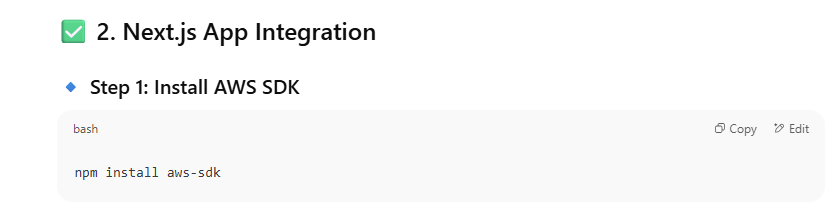

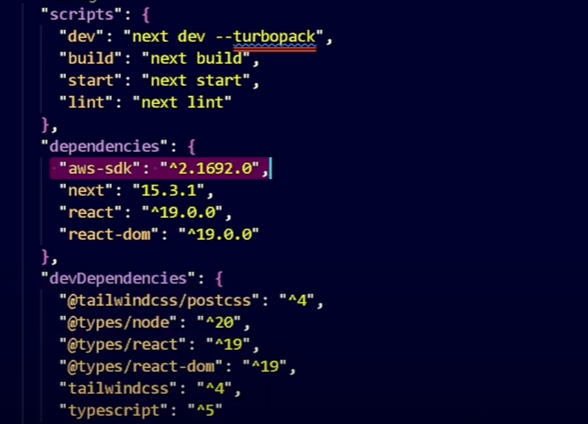

# **✅ .env.local (important)**

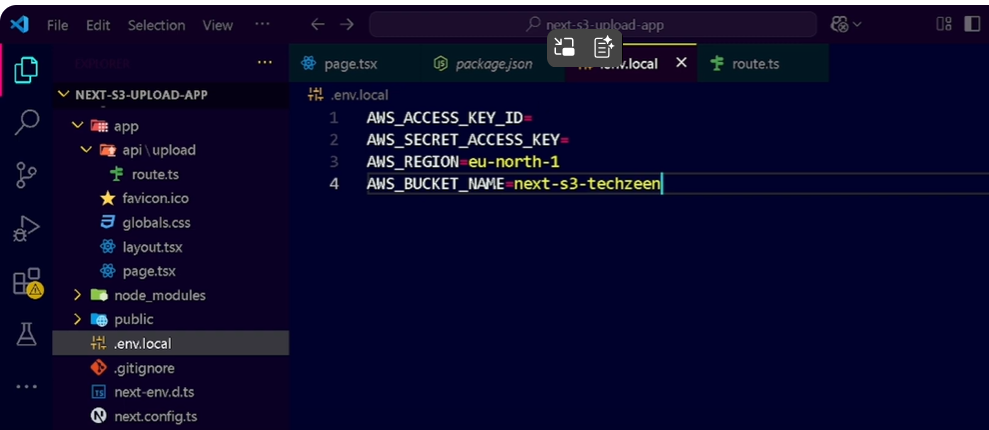

# **🔹 Step 2: Create a pages/api/upload.js**



```
import aws from 'aws-sdk';
import formidable from 'formidable';
import fs from 'fs';

export const config = {
  api: {
    bodyParser: false
  }
};

const s3 = new aws.S3({
  accessKeyId: process.env.AWS_ACCESS_KEY_ID,
  secretAccessKey: process.env.AWS_SECRET_ACCESS_KEY,
  region: 'your-region'
});

export default async function handler(req, res) {
  const form = new formidable.IncomingForm();

  form.parse(req, async (err, fields, files) => {
    const fileContent = fs.readFileSync(files.file.filepath);
    
    const params = {
      Bucket: 'my-nextjs-uploads',
      Key: files.file.originalFilename,
      Body: fileContent,
      ContentType: files.file.mimetype,
    };

    try {
      const data = await s3.upload(params).promise();
      res.status(200).json({ url: data.Location });
    } catch (err) {
      res.status(500).json({ error: 'Upload failed' });
    }
  });
}

```



# **🔹 Step 3: Create Upload Form in React**



```
// components/FileUpload.js
import { useState } from 'react';

export default function FileUpload() {
  const [file, setFile] = useState(null);

  const upload = async () => {
    const formData = new FormData();
    formData.append('file', file);

    const res = await fetch('/api/upload', {
      method: 'POST',
      body: formData,
    });

    const data = await res.json();
    alert(`File uploaded to: ${data.url}`);
  };

  return (
    <div>
      <input type="file" onChange={(e) => setFile(e.target.files[0])} />
      <button onClick={upload}>Upload</button>
    </div>
  );
}

```



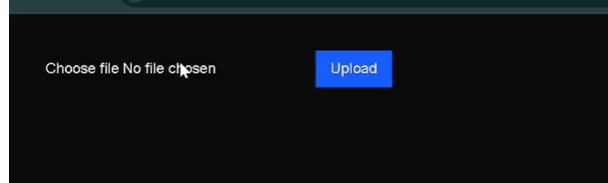

# **AWS Lambda Function**

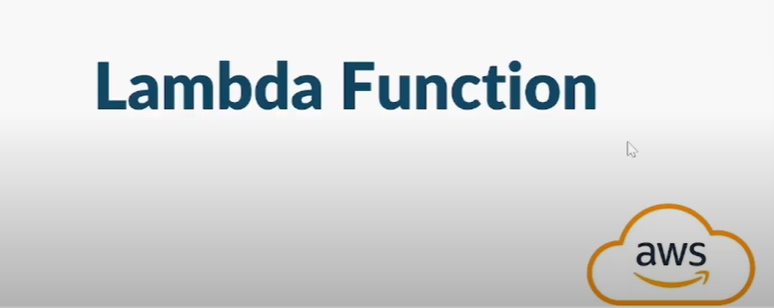

An AWS Lambda function is a serverless way to run your code in the cloud without managing servers.

# **✅ Simple Definition:**
AWS Lambda is a cloud service that runs your code automatically when triggered — and only charges you for the time it runs.

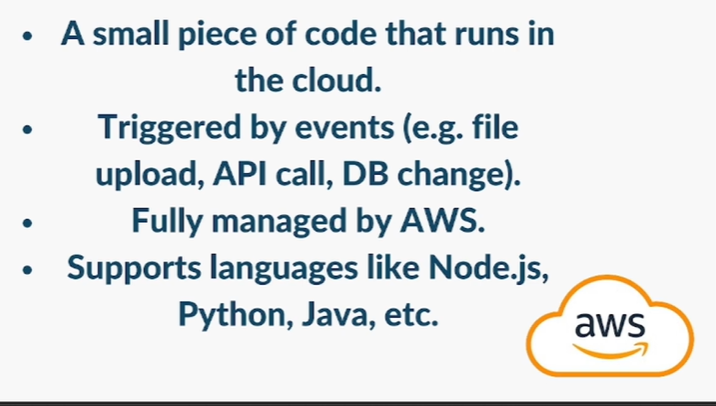

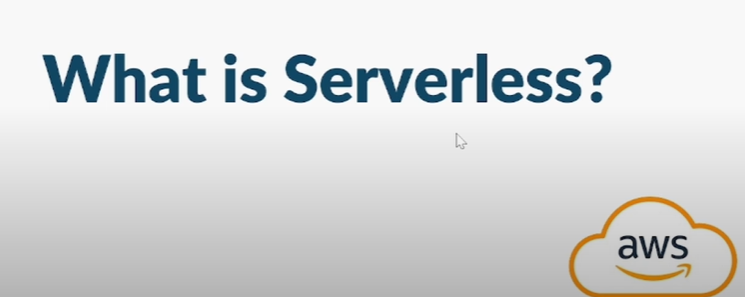

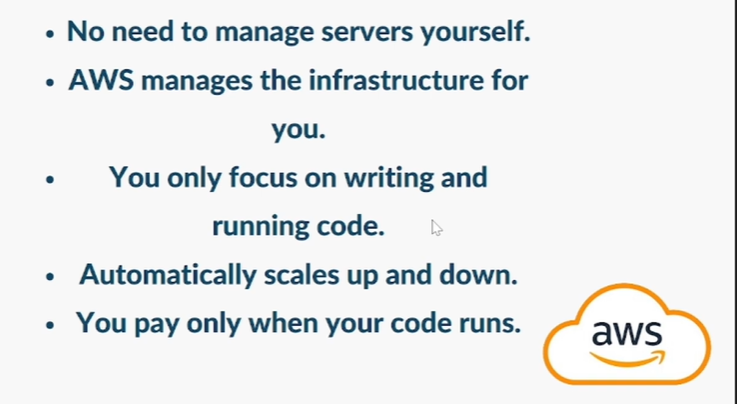

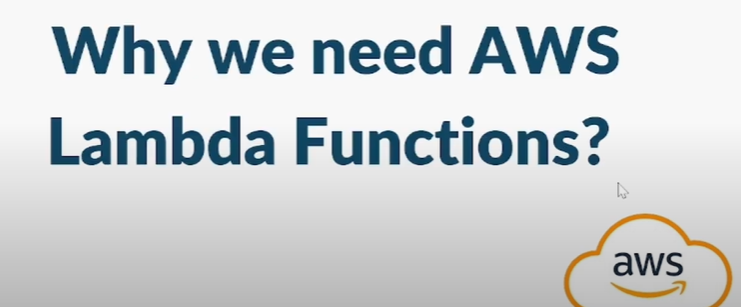

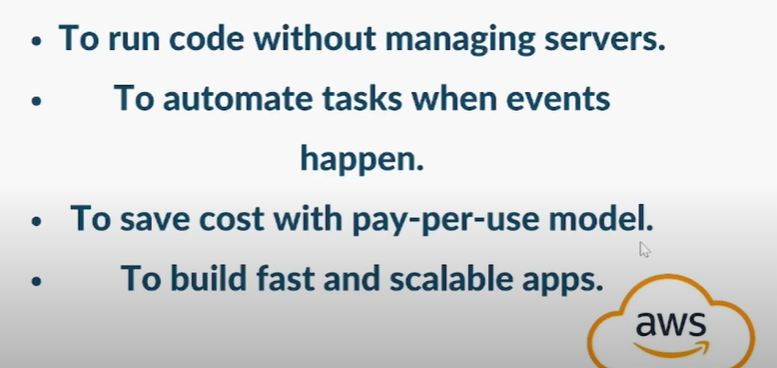

# **Create & Test AWS Lambda Function**

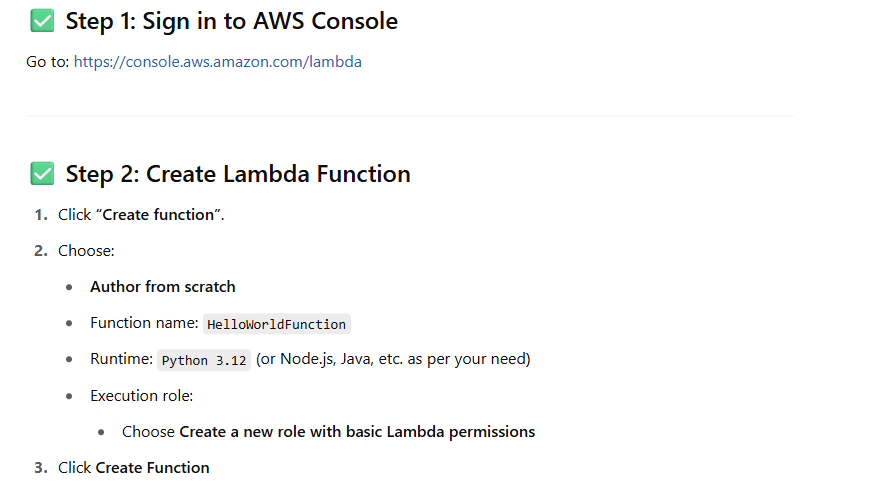

# **✅ Step 3: Add Function Code**

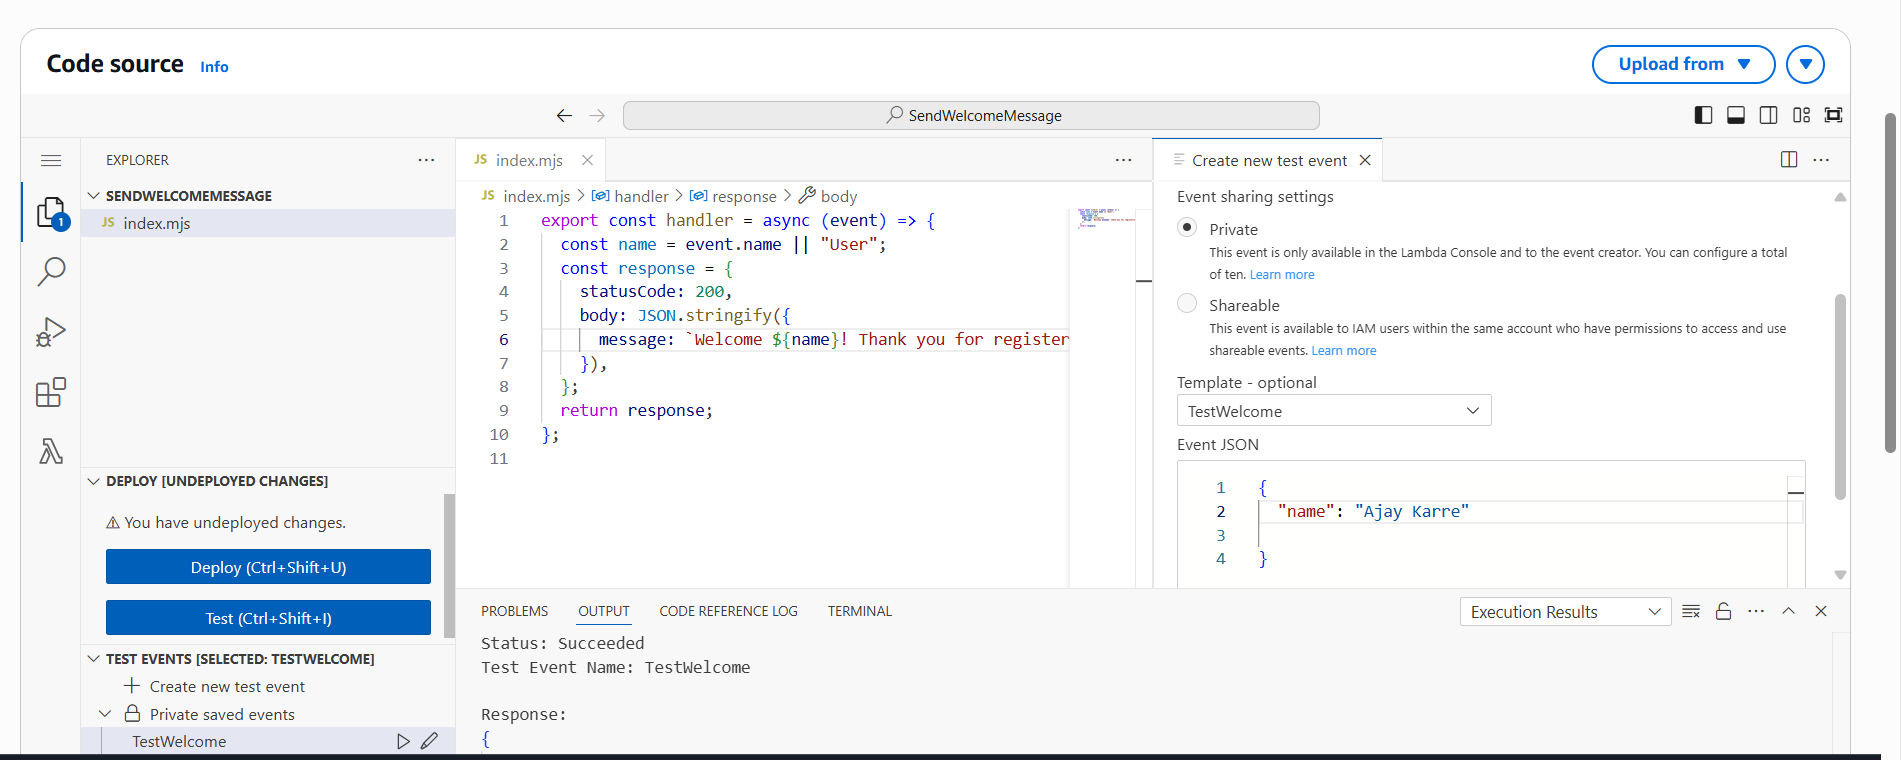